<a href="https://colab.research.google.com/github/ml-digest/illustration-collections/blob/main/Adjusted_r_squared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding R-squared vs. Adjusted R-squared

This notebook demonstrates the difference between R-squared and Adjusted R-squared in linear regression, especially when adding irrelevant features to a model. R-squared generally increases as more features are added, even if those features are just noise. Adjusted R-squared, however, penalizes the addition of unnecessary features, providing a more reliable measure of model fit.

#### `adjusted_r2_score` Function

This custom function calculates the adjusted R-squared value based on the ordinary R-squared, the number of samples, and the number of features. Adjusted R-squared accounts for the number of predictors in the model, making it more robust against overfitting than standard R-squared when comparing models with different numbers of predictors.

#### Data Simulation and Initial Model

This section simulates a dataset with `n_samples` observations. The target variable `y` is generated based on `n_informative` features and some random noise. A `LinearRegression` model is then fitted to this initial set of informative features, and both R-squared and adjusted R-squared are calculated and printed. This serves as a baseline for comparison.

#### Experiment: Adding Noise Features

This loop iteratively adds pure noise features to the dataset and re-fits the `LinearRegression` model. For each iteration, it calculates and prints the R-squared and adjusted R-squared values. Observe how R-squared tends to increase (or stay similar) even with noise features, while adjusted R-squared might decrease, indicating that the added features do not improve the model's predictive power relative to its complexity.

## Generate Synthetic Data

Generate a synthetic dataset including relevant features that predict the target variable and irrelevant (noisy) features.


In [3]:
import numpy as np

# 2. Set a random seed for reproducibility
np.random.seed(12)

# 3. Define the number of samples
n_samples = 100

# 4. Define the number of relevant features
n_relevant = 2

# 5. Define the number of irrelevant features
n_irrelevant = 10

# 6. Generate n_relevant features for X_relevant
X_relevant = np.random.rand(n_samples, n_relevant)

# 7. Generate n_irrelevant features for X_irrelevant
X_irrelevant = np.random.rand(n_samples, n_irrelevant)

# 8. Define coefficients for the relevant features and an intercept
true_coefficients = np.array([2, -1.5]).reshape(-1, 1)
intercept = 5

# 9. Generate the target variable y
y = intercept + X_relevant @ true_coefficients + np.random.randn(n_samples, 1) * 2

# 10. Combine X_relevant and X_irrelevant horizontally to create the full feature matrix X
X = np.hstack((X_relevant, X_irrelevant))

# 11. Print the shapes of X and y to verify the generated data dimensions
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (100, 12)
Shape of y: (100, 1)


## Iterate and Fit Models

Iteratively add features (first relevant, then irrelevant) to a linear regression model, calculate R-squared and Adjusted R-squared for each model, and store the results.

1. Initialize two empty lists: one to store R-squared values and another for Adjusted R-squared values.
2. Iterate through the number of features from 1 up to the total number of features available in `X`.
3. In each iteration, select a subset of `X` with the current number of features. First, add the relevant features one by one, and then add the irrelevant features.
4. Fit a `LinearRegression` model from `sklearn.linear_model` to the selected subset of `X` and the target variable `y`.
5. Calculate the R-squared value for the current model using `r2_score` from `sklearn.metrics` and append it to the R-squared list.
6. Calculate the Adjusted R-squared value using the formula: `1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))`, where `n_samples` is the number of observations (rows in `X`), `r2` is the calculated R-squared, and `n_features` is the number of features currently used in the model. Append this value to the Adjusted R-squared list.
7. After the loop, print both lists to inspect the calculated R-squared and Adjusted R-squared values.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Initialize lists to store results
r2_values = []
adj_r2_values = []

n_samples = X.shape[0]

# Loop through features, first relevant, then irrelevant
for i in range(1, X.shape[1] + 1):
    # Select subset of features
    # The first n_relevant features are relevant, the rest are irrelevant
    X_subset = X[:, :i]

    # Fit a Linear Regression model
    model = LinearRegression()
    model.fit(X_subset, y)

    # Make predictions
    y_pred = model.predict(X_subset)

    # Calculate R-squared
    r2 = r2_score(y, y_pred)
    r2_values.append(r2)

    # Calculate Adjusted R-squared
    n_features = X_subset.shape[1]
    # Handle case where (n_samples - n_features - 1) might be 0 or negative
    if (n_samples - n_features - 1) <= 0:
        adj_r2 = np.nan # Or some other appropriate value for invalid calculation
    else:
        adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    adj_r2_values.append(adj_r2)

print("R-squared values for models with increasing features:", [f'{val:.4f}' for val in r2_values])
print("Adjusted R-squared values for models with increasing features:", [f'{val:.4f}' if not np.isnan(val) else 'NaN' for val in adj_r2_values])

R-squared values for models with increasing features: ['0.1067', '0.1926', '0.2120', '0.2122', '0.2151', '0.2165', '0.2269', '0.2295', '0.2295', '0.2474', '0.2595', '0.2619']
Adjusted R-squared values for models with increasing features: ['0.0976', '0.1759', '0.1874', '0.1790', '0.1733', '0.1660', '0.1680', '0.1617', '0.1524', '0.1628', '0.1669', '0.1601']


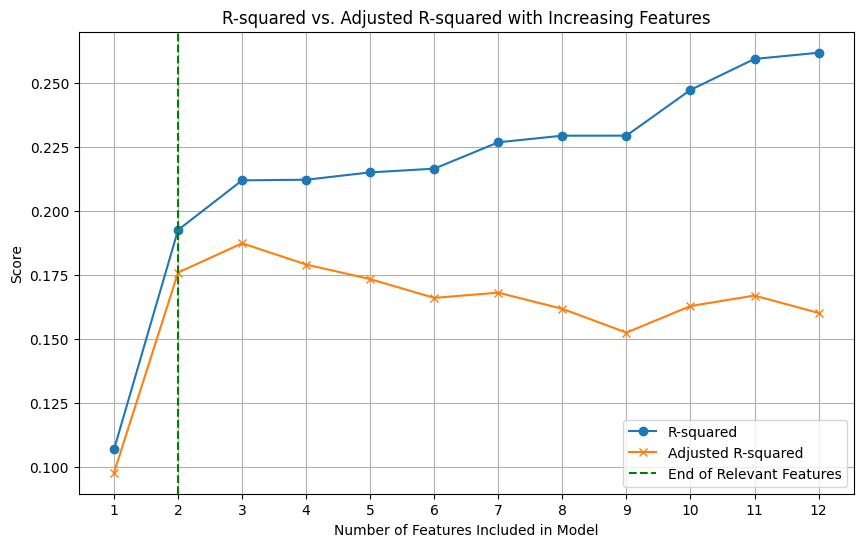

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_values) + 1), r2_values, label='R-squared', marker='o')
plt.plot(range(1, len(adj_r2_values) + 1), adj_r2_values, label='Adjusted R-squared', marker='x')

# Highlight relevant and irrelevant features
plt.axvline(x=n_relevant, color='green', linestyle='--', label='End of Relevant Features')

plt.title('R-squared vs. Adjusted R-squared with Increasing Features')
plt.xlabel('Number of Features Included in Model')
plt.ylabel('Score')
plt.xticks(range(1, len(r2_values) + 1))
plt.legend()
plt.grid(True)
plt.show()

## Summary: Adjusted R-squared vs R-squared

### Data Analysis Key Findings

*   **R-squared Trend**: As more features were added to the model, R-squared generally increased, even with the addition of irrelevant features. This is because R-squared is a measure of how much variance the model explains, and adding more variables (even noisy ones) can sometimes coincidentally explain a tiny bit more variance by chance, or simply due to the nature of its calculation (it doesn't penalize for additional features).

*   **Adjusted R-squared Trend**: Adjusted R-squared, on the other hand, showed a different behavior. It initially increased as relevant features were added (up to `n_relevant = 2` features, which are the true predictive features). After the relevant features were included, as irrelevant features were progressively added, the Adjusted R-squared started to decrease or plateau. This illustrates that Adjusted R-squared penalizes for the inclusion of unnecessary features that do not significantly improve the model's explanatory power, making it a more robust metric for feature selection.

### Insights or Next Steps

*   **R-squared vs. Adjusted R-squared**: The comparison clearly demonstrates the advantage of Adjusted R-squared. While R-squared will always increase or stay the same with the addition of new features (even irrelevant ones), Adjusted R-squared only increases if the new feature significantly improves the model more than would be expected by chance, penalizing for complexity. This makes Adjusted R-squared a better indicator of model quality when comparing models with different numbers of predictors.

*   **Feature Selection**: Adjusted R-squared is particularly useful for guiding feature selection. When building a regression model, one should aim for a model that maximizes Adjusted R-squared, as it indicates a good balance between model fit and parsimony.

*   **Overfitting**: Blindly maximizing R-squared by adding more features can lead to overfitting, where the model performs well on the training data but poorly on unseen data. Adjusted R-squared helps mitigate this by discouraging overly complex models that do not provide substantial predictive improvement.